# Chapter 3: Going Beyond the Basics: Detecting Features in Images
Hi, chào mọi người. Như trên tựa đề đã ghi, ở chương này, tụi mình sẽ đi xa hơn nữa, hơn cả mức cơ bản. Tìm hiểu sâu hơn với khác niệm mới trong mạng thần kinh.

<img src="https://gregorygundersen.com/image/cnns/41847277995.png" alt="Description" style="width:30%;">

Chương này khá dài nên mình sẽ tổng quan trước những cái mới mà chúng mình sẽ học nha:

1. Cách sử dụng **phương pháp tích chập** để trích xuất các **đặc trưng** trong ảnh. Thông qua đó ta hiểu được cách sử dụng các **lớp tích chập (Convolution layer)** để tăng hiệu quả học các bức ảnh.
2. Phương pháp **gia tăng thêm dữ liệu (augmentation)** giúp làm giàu kho dữ liệu hơn, tăng dữ liệu trong quá trình huấn luyện giúp cải thiện mô hình.
3. Phương pháp **học chuyển giao (transfer learning)** giúp mô hình có thể tận dụng lại những kiến thức đã học được trước đó.
4. Ngoài ra chúng mình cũng sẽ tìm hiểu sơ qua về phương pháp **loại bỏ ngẫu nhiên (dropout)** giúp cải thiện mô hình, tránh được tình trạng **quá khớp (overfitting)**.

#1. Chúng mình cùng tìm hiểu về phương pháp **"tích chập"** nha

Trước khi vào bài mới chúng mình cùng nhớ lại chút kiến thức ở chương trước ha.

Ở chương 2 lần trước, tụi mình có cùng tìm hiểu về xây dựng một mô hình cơ bản để nhận diện đồ vật thông qua hình ảnh từ bộ dữ liệu fashion_mnist ha. Mô hình lần trước chỉ bao gồm các lớp tuyến tính cơ bản thôi, tụi mình tiến hành trải phẳng một bức ảnh từ 2D sang 1D tức là một mảng hay vector rồi đưa vào các lớp tuyến tính để học.

Kết quả thu được từ mô hình ở chương 2 khá là tốt rồi ha, trên 80%. Tuy nhiên chúng ta có thể thấy được phương pháp này có rất nhiều hạn chế từ việc phải trải phẳng hình ảnh ra, ở dữ liệu fashion_mnist thì chỉ đơn giản là ảnh trắng đen, tức một màu mà khi trải ra số lượng giá trị đã rất lớn mà kiến thức thu được chỉ ở dạng tổng quan hình ảnh mà chúng ta nhìn thấy. Nếu với ảnh màu tức 3 kênh màu (đỏ, xanh, lam) thì việc này sẽ khó khăn đến thế nào để có thể phân biệt được.

> *Liệu có một phương pháp nào đó để ta có thể phân tích sâu hơn các bức ảnh không? Như kiểu chia bức ảnh ra thành các đối tượng nhỏ hơn để có thể phân tích sâu hơn các khía cạnh.*

Câu trả lời là có. Chính là phương pháp tích chập mà ta tìm hiểu này.


Đi sâu vào toán quá thì sẽ khó hiểu nên mọi người cứ nghĩ đơn giản vậy nha:
> Phương pháp **tích chập** trong học máy là thông qua việc sử dụng các bộ lọc để nhìn hình ảnh dưới nhiều góc độ hơn, từ đó học được nhiều hơn.

Hmmm, vẫn khó hiểu nhỉ, để mình lấy một ví dụ cụ thể.

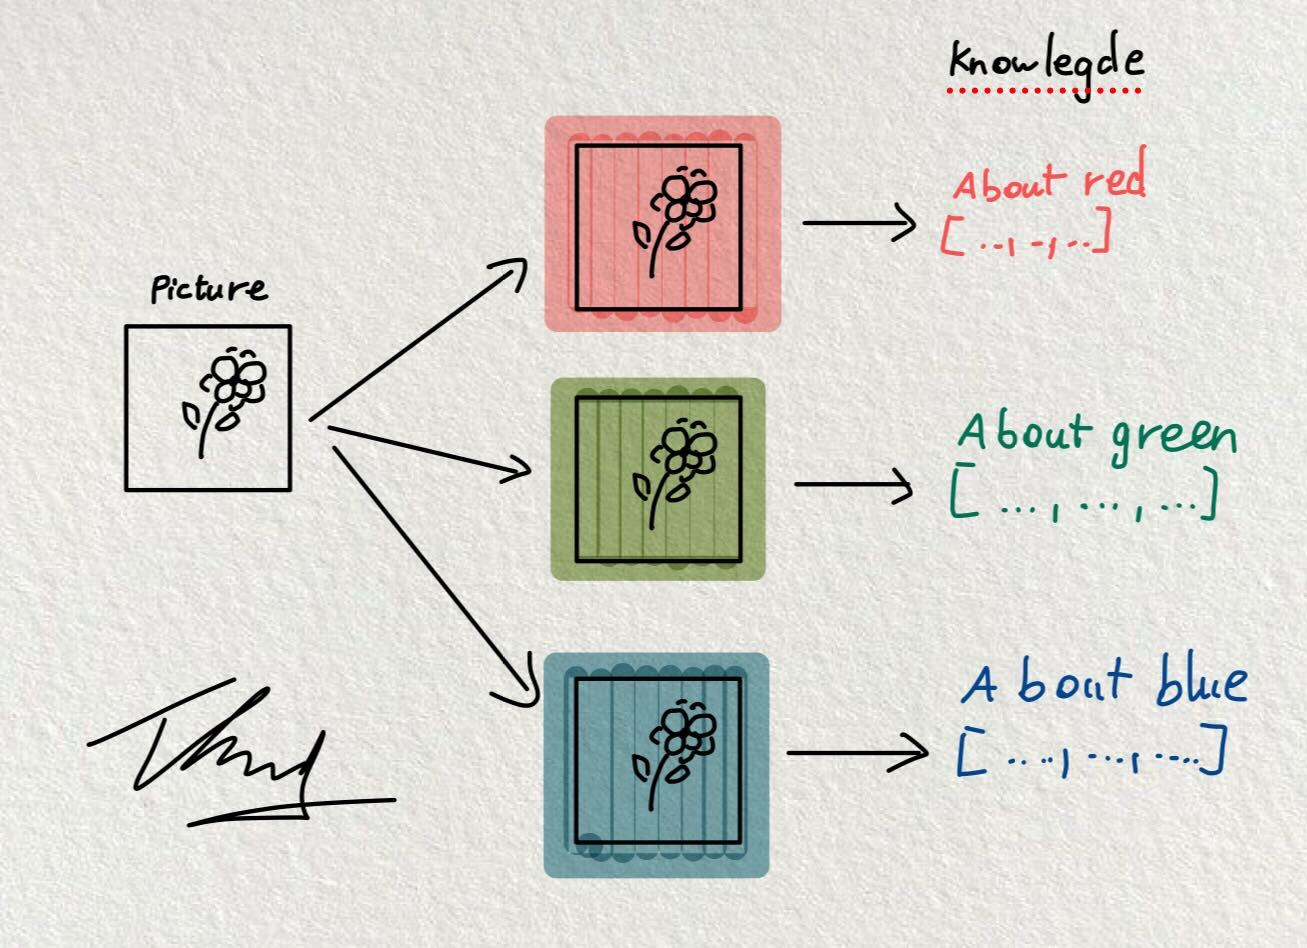

Ở đây mình có một bức ảnh và 3 miếng giấy bóng kính với 3 màu đỏ, xanh, lam. Thì khi mình chồng chúng lên bức ảnh để nhìn thi mình sẽ thấy được bức hình với các màu sắc khác nhau hơn từ đó thu được nhiều dữ liệu hơn.

> Ta có thể nói giấy bóng kính chính là các **bộ lọc** của **lớp tích chập**.

## Mình sẽ đi vào ví dụ về hình ảnh sau khi qua một lớp tích chập ha.

In [53]:
# Tải bộ dữ liệu mnist
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
(train_img, train_labels), (test_img, test_labels) = fashion_mnist.load_data()

In [54]:
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D
import numpy as np
import random

# Chọn ảnh mặc định
img = train_img[random.randint(0,100)]
print("Kích thước ảnh mặc định: ", img.shape)

# Chuẩn hóa ảnh
img = img / 255.0

# Chuyển về dạng array để đưa vào lớp cho dễ
img_arr = np.array(img)

# Ở đây chúng ta sẽ thực hiện một bước nhỏ để chỉ định lại kích thước ảnh,
# thêm số để chỉ định số lượng kênh màu, với ảnh trắng đen thì là 1
img_reshape = img.reshape(1, 28, 28, 1)

print("Kích thước ảnh sau khi được chuẩn hóa: ", img.shape)

Kích thước ảnh mặc định:  (28, 28)
Kích thước ảnh sau khi được chuẩn hóa:  (28, 28)


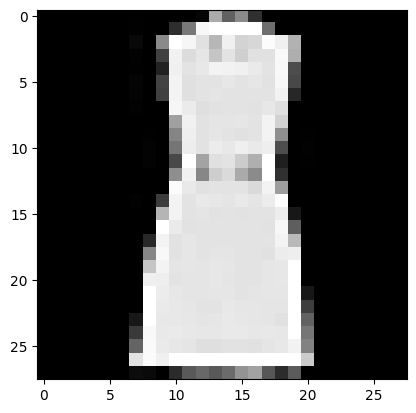

In [55]:
# Xem ảnh mặc định
plt.imshow(img, cmap="gray")

In [56]:
# Khởi tạo lớp convolution
conv_layer = tf.keras.layers.Conv2D(
    filters=8,            # Sử dụng 10 bộ lọc
    kernel_size=(3, 3)   # Kernel kích thước 3x3
)

# Xây dựng lớp Conv2D
conv_layer.build(img_reshape.shape)

In [57]:
# Đưa ảnh qua lớp Convolution
output_images = conv_layer(img_reshape)

# Chuyển đổi đầu ra về dạng numpy
output_images_np = output_images.numpy().squeeze()  # Loại bỏ batch dimension

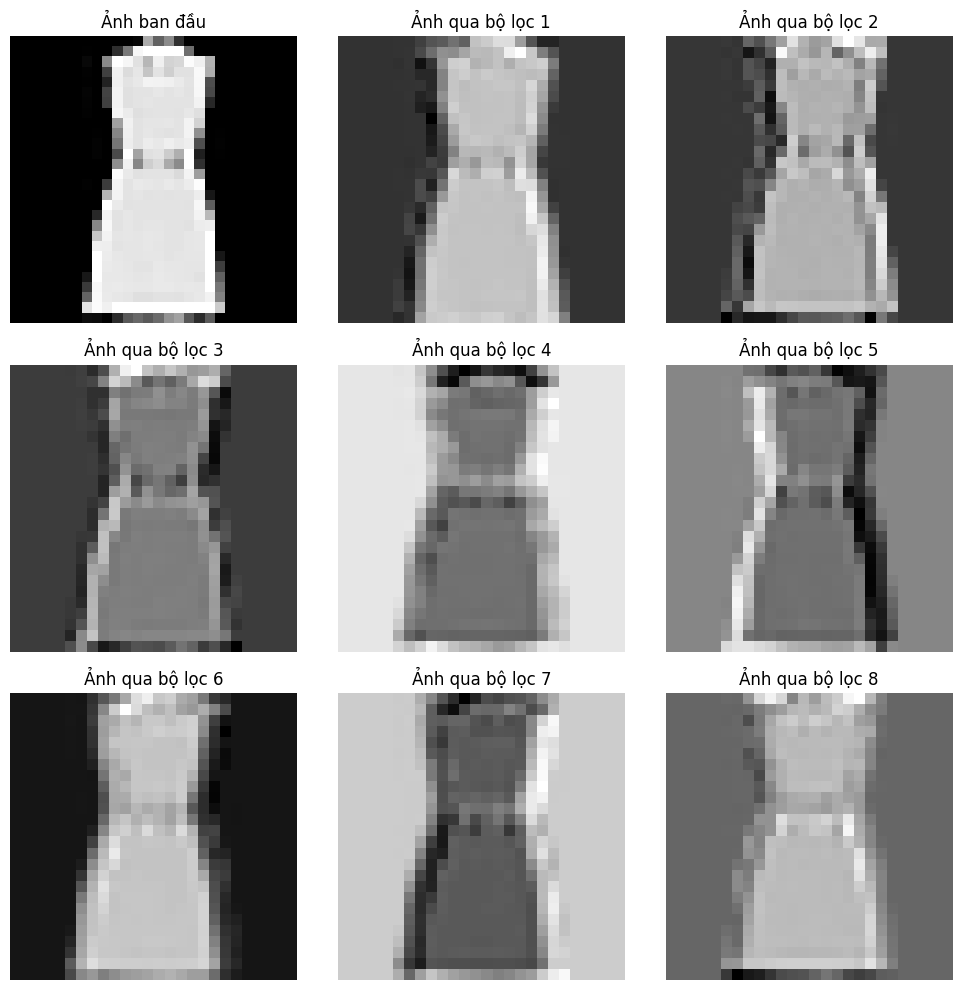

In [58]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
axs = axs.flatten()

# Hiển thị ảnh gốc
axs[0].imshow(img, cmap="gray")
axs[0].axis("off")
axs[0].set_title("Ảnh ban đầu")

# Hiển thị ảnh đã qua lớp tích chập
for i in range(8):
    axs[i+1].imshow(output_images_np[..., i], cmap="gray")
    axs[i+1].axis("off")
    axs[i+1].set_title(f"Ảnh qua bộ lọc {i+1}")

plt.tight_layout()
plt.show()

In [59]:
print("Kích thước ảnh sau khi qua lớp tích chập: ", output_images_np[..., i].shape)

Kích thước ảnh sau khi qua lớp tích chập:  (26, 26)


Như mọi người thấy, bức ảnh sau khi qua lớp tích chập có 8 bộ lọc, sinh ra 8 bức ảnh khác nhau, từ đó mô hình có thể học được nhiều khía cạnh, đặc trưng khác nhau của hình ảnh ban đầu.

Mọi người tinh mắt có thể nhận thấy, kích thước đầu vào của ảnh là (28 x 28) nhưng sau khi qua lớp tích chập thì kích thước chỉ còn (26 x 26). Điều này diễn ra là vì khi trải qua bộ lọc (3 x 3) thì phần viền hình ảnh sẽ thụt lùi vô để gộp với nhân của bộ lọc. Nói vậy khá khó hỉu nên mình sẽ lấy một hình ảnh làm ví dụ.

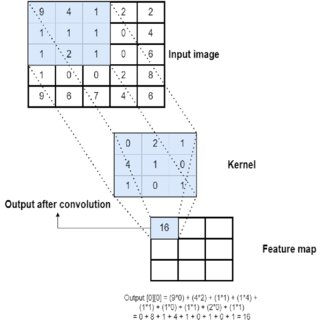

Sau khi phần cửa sổ (3 x 3) trượt trên hình ảnh gốc và cắt một phần ra nhân với bộ lọc (kernel 3 x 3) thì chúng tổng hợp lại còn 1 ô là 16 tương ứng với vị trí trung tâm số 1 ở giữa của cửa sổ và bộ lọc. Do đó phần viền ảnh trái, phải, trên, dưới đều bị cắt đi.

> Vậy có cách nào đảm bảo ảnh khi qua lớp tích chập có thể giữ nguyên kích thước không?

Tất nhiên là có rồi. Bạn chỉ cần thêm padding vào ảnh.

![Image about padding](https://miro.medium.com/v2/resize:fit:640/format:webp/1*1okwhewf5KCtIPaFib4XaA.gif)

Phần màu xanh lam đại diện cho ảnh gốc kích thước 5 x 5.

Phần xám quét qua là bộ lọc (kernel) với kích thước 3 x 3

Phần xanh lá chính là ảnh gốc.

Khi bộ lọc quét qua ảnh đã được thêm padding, thì ô pixel trung tâm bộ lọc có thể đi qua được viền của ảnh gốc, từ đó thu lại được phần viền của ảnh giúp ảnh đầu ra có kích thước tương đương với ảnh gốc.

Công thức thêm padding để giữ lại kích thước ảnh ban đầu là:
> padding = (kernel_size - 1) / 2

với kernel_size là kích thước bộ lọc.

*Lưu ý: kích thước của bộ lọc phải luôn là số lẻ, việc này giúp dễ hơn cho việc tính toán và truy xuất*